In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Loading Data

In [2]:
with open("./data/blood_donation_retention.parquet", "wb") as file:
    res = requests.get("https://dub.sh/ds-data-granular", allow_redirects=True)
    file.write(res.content)

In [2]:
dono_retention_df = pd.read_parquet("./data/blood_donation_retention.parquet", engine="auto")
dono_retention_df.head()

,donor_id,visit_date,birth_date
0,00000,2013-11-03,1964
1,00000,2014-05-26,1964
2,00000,2015-01-25,1964
3,00000,2015-08-09,1964
4,00000,2016-03-10,1964


In [17]:
aggregate_data_links = [
    "https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_facility.csv",
    "https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv",
    "https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_facility.csv",
    "https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_state.csv"
]

for link in aggregate_data_links:
    res = requests.get(link)
    filename = link.split("/")[-1]
    with open(f"./data/{filename}", "wb") as file:
        file.write(res.content)

In [2]:
dono_fac_df = pd.read_csv("./data/donations_facility.csv")

dono_state_df = pd.read_csv("./data/donations_state.csv")
newdono_fac_df = pd.read_csv("./data/newdonors_facility.csv")
newdono_state_df = pd.read_csv("./data/newdonors_state.csv")

### EDA

In [14]:
print(dono_fac_df.shape, dono_state_df.shape, newdono_fac_df.shape, newdono_state_df.shape)

(145002, 19) (92274, 19) (145002, 13) (92274, 13)


In [33]:
dono_fac_df.head()

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0


In [34]:
dono_state_df.head()

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,371,4,16,0,316,71,4,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,548,17,17,0,555,19,8,328,250,4


In [35]:
newdono_fac_df.head()

,date,hospital,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Hospital Sultanah Nora Ismail,21,2,2,3,6,1,0,0,1,0,36
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,0,0,0,1,0,0,0,0,0,0,1
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,0,0,0,0,0,0,0,0,0,0,0


In [36]:
newdono_state_df.head()

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328


In [38]:
newdono_state_df[newdono_state_df["state"] == "Malaysia"]

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,2024-01-13,Malaysia,150,92,50,34,32,17,13,6,0,0,394
6587,2024-01-14,Malaysia,144,67,58,58,46,36,18,11,0,0,438
6588,2024-01-15,Malaysia,152,40,28,21,14,6,4,2,0,0,267
6589,2024-01-16,Malaysia,136,68,29,29,19,23,9,4,2,0,319


### Feature Engineering

In [17]:
dono_fac_df = dono_fac_df.assign(year=pd.to_datetime(dono_fac_df["date"]).dt.year)
dono_fac_df = dono_fac_df.assign(month=pd.to_datetime(dono_fac_df["date"]).dt.month)
dono_fac_df = dono_fac_df.assign(day_of_year=pd.to_datetime(dono_fac_df["date"]).dt.dayofyear)
dono_fac_df.head()

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular,year,month,day,day_of_year
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2,2006,1,1,1
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006,1,1,1
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0,2006,1,1,1
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006,1,1,1
4,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,2006,1,1,1


year
2006     599.704110
2007     765.419178
2008     951.822404
2009    1055.561644
2010    1077.158904
2011    1141.783562
2012    1160.453552
2013    1205.224658
2014    1336.454795
2015    1468.005479
2016    1457.073770
2017    1449.654795
2018    1548.230137
2019    1536.375342
2020    1359.535519
2021    1369.219178
2022    1533.772603
2023    1576.446575
2024    1582.529412
dtype: float64

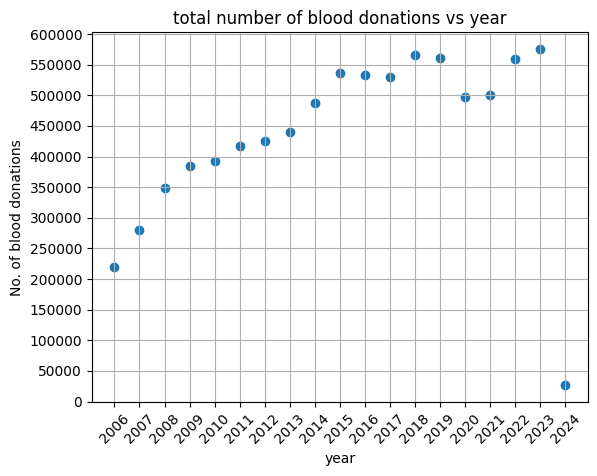

In [39]:
plt.scatter(x=dono_fac_df["year"].drop_duplicates(), y=dono_fac_df.groupby("year")["daily"].agg("sum"))
plt.xticks(dono_fac_df["year"].unique(), rotation=45)
plt.yticks(list(range(0, 600_001, 50_000)))
plt.grid(True)
plt.title("total number of blood donations vs year")
plt.xlabel("year")
plt.ylabel("No. of blood donations");

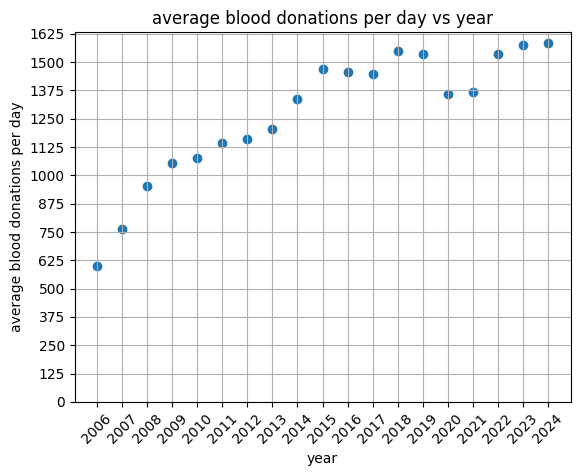

In [38]:
plt.scatter(x=dono_fac_df["year"].drop_duplicates(), y=dono_fac_df.groupby("year")["daily"].agg("sum")/dono_fac_df.groupby("year")["day_of_year"].agg("max"))
plt.xticks(dono_fac_df["year"].unique(), rotation=45)
plt.yticks(list(range(0, 1700, 125)))
plt.grid(True)
plt.title("average blood donations per day vs year")
plt.xlabel("year")
plt.ylabel("average blood donations per day");

In [32]:
np.corrcoef(x=dono_fac_df["date"].index, y=dono_fac_df["daily"])

array([[1.        , 0.09433961],
       [0.09433961, 1.        ]])